In [1]:
import pandas as pd
import seaborn as sns
import datetime
import matplotlib as mpl

In [2]:
import pandas as pd
# import pydoop.hdfs as hd
from hdfs import InsecureClient
import os

In [3]:
client_hdfs = InsecureClient('http://' + 'localhost' + ':50070')

In [12]:
with client_hdfs.read('/data/record-147753.csv', encoding = 'utf-8') as reader:
    next_data = pd.read_csv(reader, header=0)

In [13]:
# my_data = pd.read_csv("/Users/ujwal/Downloads/record-147753.csv", header=0)

In [15]:
next_data = next_data.drop('sleep_position [NA](/api/datatype/270/)',1)

In [16]:
next_data = next_data.dropna()

In [17]:
next_data

,time [s/256],breathing_rate [rpm](/api/datatype/33/),minute_ventilation [mL/min](/api/datatype/36/),activity [g](/api/datatype/49/),heart_rate [bpm](/api/datatype/19/),cadence [spm](/api/datatype/53/)
1,3.897937e+11,10.0,0.00,0.000000,70.0,0.0
2,3.897937e+11,10.0,0.00,0.000000,70.0,0.0
3,3.897937e+11,10.0,0.00,0.000000,70.0,0.0
4,3.897937e+11,10.0,0.00,0.332031,70.0,0.0
5,3.897937e+11,21.0,10398.24,0.386719,70.0,0.0
6,3.897937e+11,51.0,10398.24,0.375000,70.0,0.0
7,3.897937e+11,70.0,13359.68,0.585938,70.0,0.0
8,3.897937e+11,63.0,13359.68,0.066406,70.0,0.0
9,3.897937e+11,47.0,11898.88,0.015625,70.0,0.0
10,3.897937e+11,37.0,11898.88,0.015625,70.0,0.0


In [18]:
next_data.rename(columns={'time [s/256]': 'TimeSeries','breathing_rate [rpm](/api/datatype/33/)':'breathing_rate', 'minute_ventilation [mL/min](/api/datatype/36/)':'ventilation','activity [g](/api/datatype/49/)':'activity', 'heart_rate [bpm](/api/datatype/19/)': 'heart_rate','cadence [spm](/api/datatype/53/)':'steps'}, inplace=True)

In [19]:
for i in next_data.index:
        next_data.at[i, 'TimeSeries'] = next_data.at[i, 'TimeSeries'] /256

In [20]:
for i in next_data.index:
        next_data.at[i, 'TimeSeries'] = datetime.datetime.fromtimestamp(next_data.at[i, 'TimeSeries'])
for i in next_data.index:
        next_data.at[i, 'TimeSeries'] = next_data.at[i, 'TimeSeries'].strftime('%Y-%m-%d %H:%M:%S')

In [21]:
next_data['TimeSeries'] =  pd.to_datetime(next_data['TimeSeries'], format='%Y-%m-%d %H:%M:%S')

In [22]:
next_data = next_data.reset_index().set_index('TimeSeries').resample('H').mean()

In [24]:
next_data

,index,breathing_rate,ventilation,activity,heart_rate,steps
TimeSeries,,,,,,
2018-04-01 21:00:00,1344.5,24.815848,12627.654583,0.165686,95.696057,34.613839
2018-04-01 22:00:00,4488.5,21.107778,10330.279600,0.096381,94.602778,18.810556
2018-04-01 23:00:00,8088.5,9.906111,5643.395022,0.014363,95.639444,0.279722
2018-04-02 00:00:00,11688.5,2.670278,1983.570889,0.013081,90.297222,0.921389
2018-04-02 01:00:00,15288.5,2.000000,0.000000,0.005613,93.400556,0.000000
2018-04-02 02:00:00,18888.5,2.000000,0.000000,0.004844,79.653889,0.000000
2018-04-02 03:00:00,22488.5,2.000000,0.000000,0.007500,79.398611,0.000000
2018-04-02 04:00:00,26088.5,2.000000,0.450044,0.008047,97.300000,0.000000
2018-04-02 05:00:00,29610.0,2.000000,0.520709,0.007424,95.896021,0.000000


In [25]:
new_data = next_data.drop('index',1)

In [26]:
new_data

,breathing_rate,ventilation,activity,heart_rate,steps
TimeSeries,,,,,
2018-04-01 21:00:00,24.815848,12627.654583,0.165686,95.696057,34.613839
2018-04-01 22:00:00,21.107778,10330.279600,0.096381,94.602778,18.810556
2018-04-01 23:00:00,9.906111,5643.395022,0.014363,95.639444,0.279722
2018-04-02 00:00:00,2.670278,1983.570889,0.013081,90.297222,0.921389
2018-04-02 01:00:00,2.000000,0.000000,0.005613,93.400556,0.000000
2018-04-02 02:00:00,2.000000,0.000000,0.004844,79.653889,0.000000
2018-04-02 03:00:00,2.000000,0.000000,0.007500,79.398611,0.000000
2018-04-02 04:00:00,2.000000,0.450044,0.008047,97.300000,0.000000
2018-04-02 05:00:00,2.000000,0.520709,0.007424,95.896021,0.000000


In [27]:
hr = "heart_rate"
check = pd.DataFrame(index=new_data.index)

In [28]:
check[hr] = new_data[hr]

In [29]:
check

,heart_rate
TimeSeries,
2018-04-01 21:00:00,95.696057
2018-04-01 22:00:00,94.602778
2018-04-01 23:00:00,95.639444
2018-04-02 00:00:00,90.297222
2018-04-02 01:00:00,93.400556
2018-04-02 02:00:00,79.653889
2018-04-02 03:00:00,79.398611
2018-04-02 04:00:00,97.300000
2018-04-02 05:00:00,95.896021


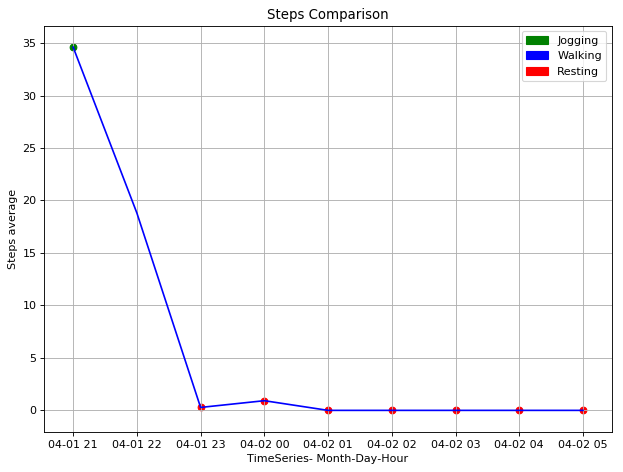

In [30]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# The x and y data to plot
y = new_data['steps']
x = new_data.index

# Threshold above which the markers should be red
threshold1 = 30
threshold2 = 10
threshold3 = 0

# Creating legend for Ideal heart_rate values
green_patch = mpatches.Patch(color='green', label='Jogging')
blue_patch = mpatches.Patch(color='blue', label='Walking')
red_patch = mpatches.Patch(color='red', label='Resting')

# Create figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# Labelling the graph
plt.title("Steps Comparison")
plt.ylabel("Steps average")
plt.xlabel("TimeSeries- Month-Day-Hour")
plt.legend(handles=[green_patch, blue_patch, red_patch], loc=1)
plt.grid(True)
plt.tight_layout()

# Plot the line
plt.plot(x, y, color='blue')

# Add below threshold markers
below_threshold = y < threshold2
plt.scatter(x[below_threshold], y[below_threshold], color='red') 

# Add above threshold markers
above_threshold = y > threshold1
plt.scatter(x[above_threshold], y[above_threshold], color='green')

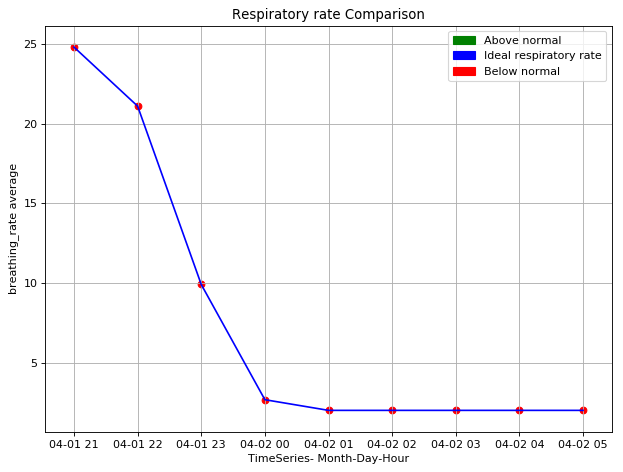

In [15]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# The x and y data to plot
y = new_data['breathing_rate']
x = new_data.index

# Threshold above which the markers should be red
threshold1 = 16
threshold2 = 12

# Creating legend for Ideal heart_rate values
green_patch = mpatches.Patch(color='green', label='Above normal')
blue_patch = mpatches.Patch(color='blue', label='Ideal respiratory rate')
red_patch = mpatches.Patch(color='red', label='Below normal')

# Create figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# Labelling the graph
plt.title("Respiratory rate Comparison")
plt.ylabel("breathing_rate average")
plt.xlabel("TimeSeries- Month-Day-Hour")
plt.legend(handles=[green_patch, blue_patch, red_patch], loc=1)
plt.grid(True)
plt.tight_layout()

# Plot the line
plt.plot(x, y, color='blue')

# Add below threshold markers
below_threshold = y <= threshold2
plt.scatter(x[below_threshold], y[below_threshold], color='red') 

# Add above threshold markers
above_threshold = y >= threshold1
plt.scatter(x[above_threshold], y[above_threshold], color='red')